## Step 1: Load the two soft-label (urgency, desire, fear) dataframes and make them trainable

In [1]:
import pandas as pd
import numpy as np

In [23]:
iwspa_soft = pd.read_csv("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/iwspa_ap_train_self_report.csv")
spamSMS_soft = pd.read_csv("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/spam_sms_self_report.csv")
iwspa = pd.read_pickle("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/combined_iwspa_ap_train_set.pkl")
spamSMS = pd.read_pickle("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/spamSMS.pkl")
iwspa_BERT = np.load("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/BERT_combined_iwspa_ap_train_set.npy")
iwspa_SBERT = np.load("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/SBERT_combined_iwspa_ap_train_set.npy")
spamSMS_BERT = np.load("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/BERT_spamSMS.npy")
spamSMS_SBERT = np.load("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/SBERT_spamSMS.npy")

In [47]:
iwspa_soft["text"] = iwspa_soft.serial_in_combined_iwspa_ap_train_set_pkl.apply(lambda x:iwspa.loc[x].text)
iwspa_soft["tokenized"] = iwspa_soft.serial_in_combined_iwspa_ap_train_set_pkl.apply(lambda x:iwspa.loc[x].tokenized)
spamSMS_soft["text"] = spamSMS_soft.serial_in_spam_csv.apply(lambda x:spamSMS.loc[x].text)
spamSMS_soft["tokenized"] = spamSMS_soft.serial_in_spam_csv.apply(lambda x:spamSMS.loc[x].tokenized)
iwspa_soft["source"] = "iwspa_ap"
spamSMS_soft["source"] = "spamSMS"

In [48]:
spamSMS_soft

,serial_in_spam_csv,Urgency,Desire,Fear,Authority,Social_Proof,Likability,Consistency,Scarcity,Reciprocation,comments,text,tokenized,source
0,4875,0,2,0,0,0,1,0,1,0,Desire:Sexual,lyricalladie(21/F) is inviting you to be her f...,"[101, 16376, 27266, 2666, 1006, 2538, 1013, 10...",spamSMS
1,787,0,2,0,0,0,2,0,2,0,Desire:Sexual,Ever thought about living a good life with a p...,"[101, 2412, 2245, 2055, 2542, 1037, 2204, 2166...",spamSMS
2,146,0,2,0,0,0,2,0,0,0,Desire:Sexual,FreeMsg Why haven't you replied to my text? I'...,"[101, 2489, 5244, 2290, 2339, 4033, 1005, 1056...",spamSMS
3,2013,0,2,0,0,0,2,0,2,0,Desire:Financial,Great News! Call FREEFONE 08006344447 to claim...,"[101, 2307, 2739, 999, 2655, 2489, 14876, 2638...",spamSMS
4,1776,0,2,0,0,0,2,0,1,0,Desire:Financial,Call FREEPHONE 0800 542 0578 now!,"[101, 2655, 2489, 9864, 5511, 8889, 5139, 2475...",spamSMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1096,0,2,0,0,0,99,0,99,0,Desire:Financial,Dear Subscriber ur draw 4 å£100 gift voucher w...,"[101, 6203, 4942, 29234, 2099, 24471, 4009, 10...",spamSMS
71,2668,0,2,0,0,0,99,0,99,0,Desire:Sexual,Wanna get laid 2nite? Want real Dogging locati...,"[101, 10587, 2131, 4201, 1016, 3490, 2618, 102...",spamSMS
72,1491,0,2,0,0,0,99,0,99,0,Desire:Financial,Your account has been credited with 500 FREE T...,"[101, 2115, 4070, 2038, 2042, 5827, 2007, 3156...",spamSMS
73,1941,0,2,0,0,0,99,0,99,0,Desire:Financial,WELL DONE! Your 4* Costa Del Sol Holiday or å£...,"[101, 2092, 2589, 999, 2115, 1018, 1008, 6849,...",spamSMS


In [49]:
all_soft = pd.concat([iwspa_soft, spamSMS_soft])
all_soft.drop(columns = ["serial_in_combined_iwspa_ap_train_set_pkl", "serial_in_spam_csv"], inplace=True)
all_soft = all_soft.sample(frac=1)
all_soft.reset_index(drop=True, inplace=True)

In [53]:
all_soft.to_pickle("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/Soft_labels_combined.pkl")

In [55]:
all_soft.head()

,Urgency,Desire,Fear,Authority,Social_Proof,Likability,Consistency,Scarcity,Reciprocation,comments,text,tokenized,source
0,1,0,1,2,0,0,1,2,0,NaN,"Dear Student,\nYour student portal! was recent...","[101, 6203, 3076, 1010, 2115, 3076, 9445, 999,...",iwspa_ap
1,2,0,2,2,0,0,1,2,1,NaN,From: Bank of America Alert [mailto:user@domai...,"[101, 2013, 1024, 2924, 1997, 2637, 9499, 1031...",iwspa_ap
2,2,0,2,2,0,0,2,2,1,NaN,ornell organization\n===================\nDear...,"[101, 2030, 9091, 3029, 1027, 1027, 1027, 1027...",iwspa_ap
3,2,0,2,2,0,0,1,1,1,NaN,An Attempt has been made to Your Account from ...,"[101, 2019, 3535, 2038, 2042, 2081, 2000, 2115...",iwspa_ap
4,0,2,0,0,0,99,0,99,0,Desire:Sexual,Wanna get laid 2nite? Want real Dogging locati...,"[101, 10587, 2131, 4201, 1016, 3490, 2618, 102...",spamSMS


In [56]:
all_soft.shape

(138, 13)

In [58]:
all_soft.Urgency.value_counts()

0    68
2    54
1    16
Name: Urgency, dtype: int64

In [60]:
all_soft.Fear.value_counts()

0    92
2    31
1    15
Name: Fear, dtype: int64

In [62]:
all_soft.Desire.value_counts()

2    86
0    39
1    13
Name: Desire, dtype: int64

In [64]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 16.8 MB/s eta 0:00:01


In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
all_soft_urgent = all_soft[all_soft.Urgency>=1]
all_soft_not_urgent = all_soft[all_soft.Urgency==0]

In [75]:
def create_wordcloud(df):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df.text:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

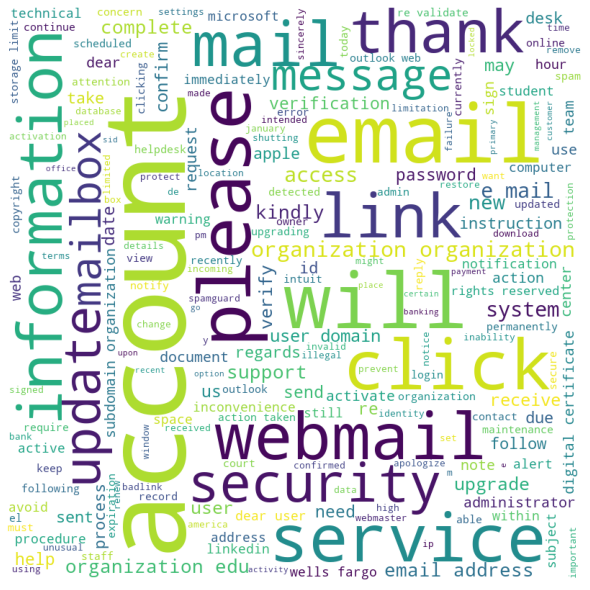

In [76]:
create_wordcloud(all_soft[all_soft.Fear>=1])

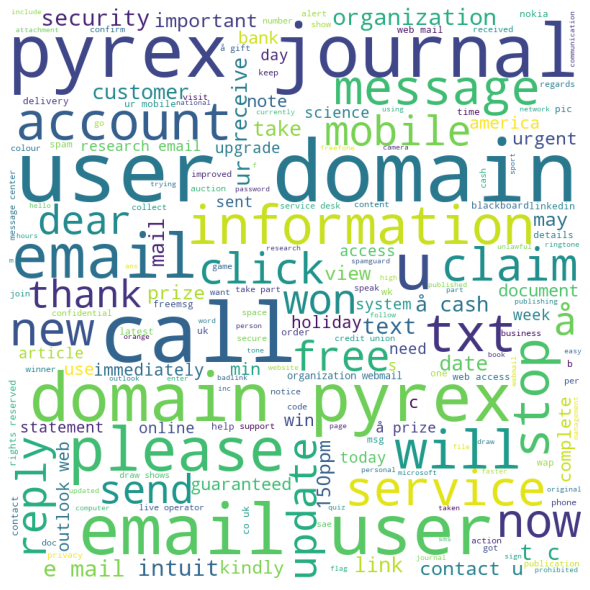

In [77]:
create_wordcloud(all_soft[all_soft.Desire>=1])

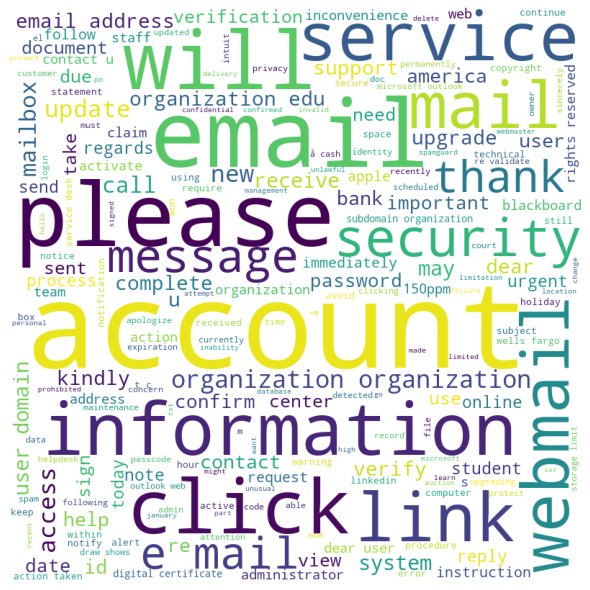

In [78]:
create_wordcloud(all_soft[all_soft.Urgency>=1])

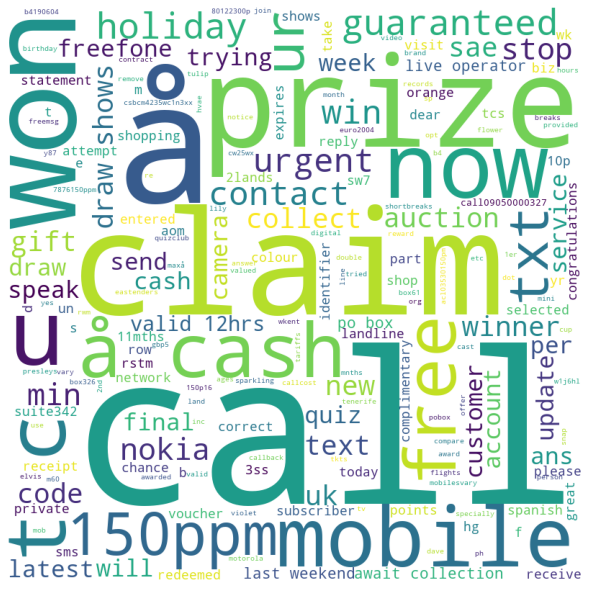

In [82]:
create_wordcloud(all_soft[all_soft.comments=="Desire:Financial"])

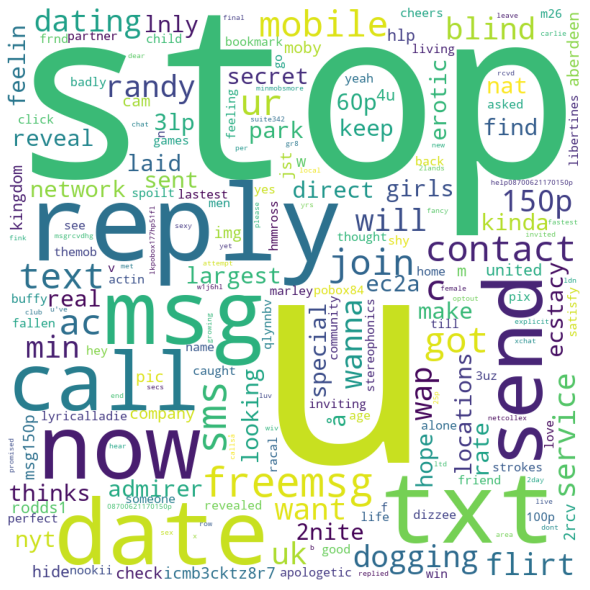

In [83]:
create_wordcloud(all_soft[all_soft.comments=="Desire:Sexual"])

## Step 2: Save the BERT and SBERT features

In [84]:
from transformers import BertModel, AdamW, get_linear_schedule_with_warmup
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import pandas as pd
import numpy as np
import os

In [89]:
def create_data_set(datapath):
    df = pd.read_pickle(datapath)
    train_text = np.array(list(df["tokenized"]))
    attention_masks = np.where(train_text>0, 1, 0)
    return torch.tensor(train_text), torch.tensor(attention_masks)

def create_dataloader(train_text, attention_masks, batch_size=32):
    # Create the DataLoader for our training set
    '''
    This function will create a dataloader for our training set. The dataloader will help to feed the randomly 
    sampled data on each batch. The batch size is selected to be 16, is simply as instructed in the original
    paper. 
    '''
    train_data = TensorDataset(train_text, attention_masks)
    train_sampler = SequentialSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    return train_dataloader

def BERT_features_saved(datapath):
    for filename in [f for f in os.listdir(datapath) if f=="Soft_labels_combined.pkl"]:
        input_ids, att_mask = create_data_set(datapath+filename)
        device = torch.device("cuda")
        bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
        loader = create_dataloader(input_ids, att_mask, batch_size=8)
        All_batch = []
        for step, batch in enumerate(loader):
            token, mask = batch
            outputs = bert_model(token.to(device), mask.to(device))
            last_hidden_state_cls = outputs[0][:, 0, :]
            np_array = last_hidden_state_cls.detach().cpu().numpy()
            All_batch.append(np_array)
            if step%100==0:
                print("{} completed {} percent".format(filename, step*100/len(loader)))
                      
        p = np.concatenate(All_batch, axis=0)
        npy_file_path = datapath + "BERT_" + filename.split(".pkl")[0] + ".npy"
        saved_path = np.save(npy_file_path, p)
    

In [90]:
BERT_features_saved("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/")

Soft_labels_combined.pkl completed 0.0 percent


In [93]:
from sentence_transformers import SentenceTransformer
def SBERT_features_saved(datapath):
    for filename in [f for f in os.listdir(datapath) if f=="Soft_labels_combined.pkl"]:
        df = pd.read_pickle(datapath + filename)
        device = torch.device("cuda")
        sbert_model = SentenceTransformer('paraphrase-mpnet-base-v2').to(device)
        sentence_embeddings = sbert_model.encode(df["text"])
        npy_file_path = datapath + "SBERT_" + filename.split(".pkl")[0] + ".npy"
        saved_path = np.save(npy_file_path, sentence_embeddings)

In [94]:
SBERT_features_saved("/disk2/sadat/PhishingResearch/processed_work/psych_trait_experiments/Files/")

You try to use a model that was created with version 1.2.0, however, your version is 1.0.3. This might cause unexpected behavior or errors. In that case, try to update to the latest version.



